# Dr D's Notes on Imaging Processing for HW3

***

# The Digits Dataset
Here's some code to help you get started.  Again, you won't want all this in your final report. 

In [36]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.data.shape)

(1797, 64)


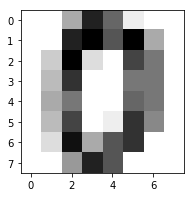

In [37]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

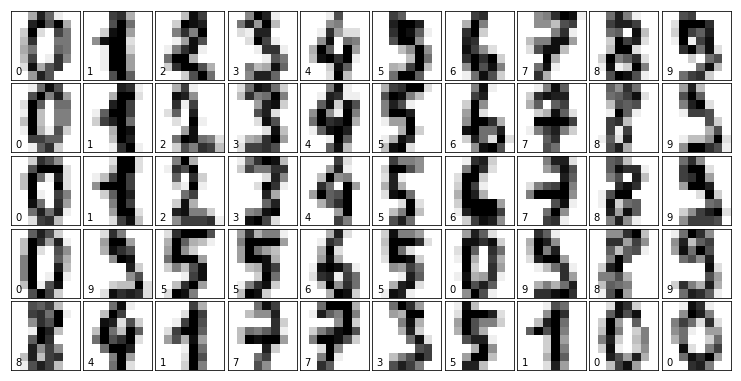

In [38]:
fig = plt.figure(figsize=(10, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5,10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

***
# Load my images

In [39]:
from PIL import Image

In [40]:
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np

Here's my very, very small image drawn in MS paint
![alt text](nine.png "My 9")

In [41]:
i9 = Image.open("nine.png")

In [70]:
c = i9.convert(mode="L").resize((8,8)) # from RGB to 8-bit BW
x9 = np.array(c) # load into numpy array
x9 = 255 - x9  # "invert" so 0 is white 
x9 = np.floor_divide(x9,16)  # scale from 0-255 to 0-15
x9

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  5,  4,  0,  0,  0],
       [ 0, 15,  0,  0,  0, 10,  0,  0],
       [ 0,  0, 15, 12, 12, 15,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

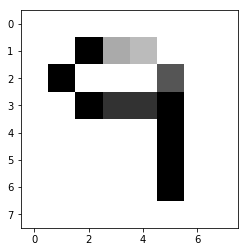

In [47]:
imshow(x9, cmap="binary")

*** 
# TRAIN AND CLASSIFY

In [49]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(digits.data, digits.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

We need to do some work on array shapes.  Notice that we have arrays of 3 flavors: 1D 64 elements, 2D 1x64, and 2D 8x8  

In [50]:
digits.data.shape

(1797, 64)

In [51]:
digits.target.shape

(1797,)

In [52]:
x9.shape

(8, 8)

In [53]:
my9 = x9.reshape(-1)  # converts 2D 8x8 into 1D 64
my9.shape

(64,)

Predict needs a 2D array

In [54]:
m = my9.reshape((1,-1))
m.shape

(1, 64)

In [56]:
yp = clf.predict(m)  # classify my image, should be a 9

In [58]:
print(yp)

[9]


In [72]:
dist, ind = clf.kneighbors(m,1) # find the most similar image

In [73]:
print(dist, ind[0][0])

[[ 37.]] 1249


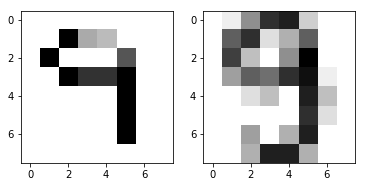

In [62]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(x9, cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(digits.images[ind[0][0]], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [63]:
digits.target[ind[0][0]]

9

## HOORAY!
So that's all we need to do.  Just for fun let's take a look at more neighbors

In [64]:
k = 15
d2, i2 = clf.kneighbors(m,k)
for j in range(k):
    print(j, digits.target[ i2[0][j] ], d2[0][j])

0 9 37.0
1 9 38.0788655293
2 9 38.4967531098
3 9 38.5875627631
4 9 39.3192065027
5 9 39.686269666
6 9 40.286474157
7 9 41.218927691
8 9 41.4246303544
9 9 41.8090899207
10 5 42.5088226137
11 9 42.5558456619
12 5 42.6848919408
13 5 42.8602379835
14 9 42.9068759058


The first 10 nearest neighbors are all 9's.  Then we get some 5's thrown in.

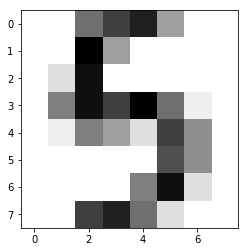

In [65]:
plt.imshow(digits.images[i2[0][10]], cmap=plt.cm.gray_r, interpolation='nearest')